In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_function(f, title, t_range=(-5, 5), flip_x=False, flip_y=False):
    t = np.linspace(t_range[0], t_range[1], 400)
    y = f(t)
    
    plt.figure(figsize=(6, 4))
    plt.plot(t, y, label='Original f(t)', color='blue')
    
    if flip_x:
        plt.plot(-t, y, '--', label='Flipped over y-axis', color='red')
    if flip_y:
        plt.plot(t, -y, '--', label='Flipped over x-axis', color='green')
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.title(title)
    plt.grid()
    plt.show()

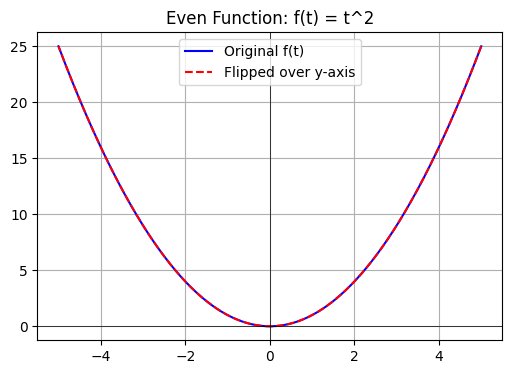

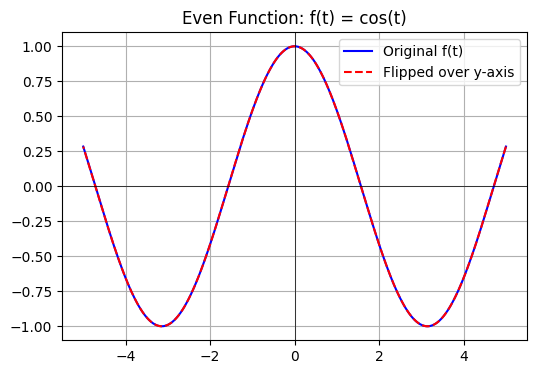

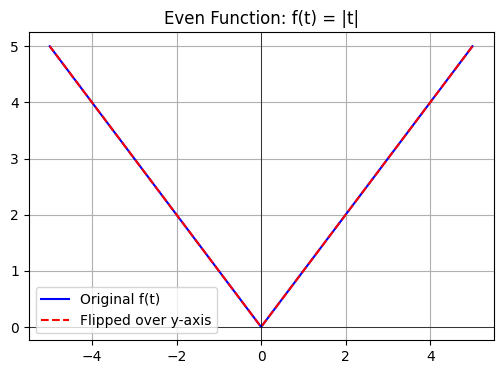

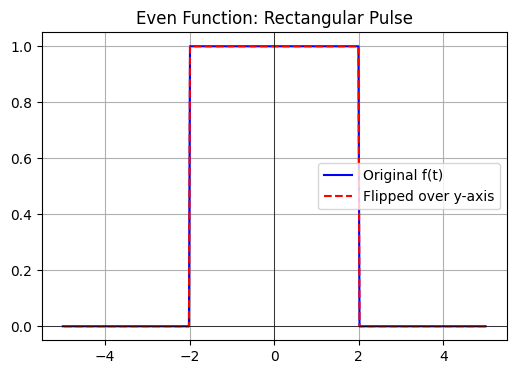

In [3]:
# Even functions
def even_t2(t):
    return t**2

def even_cos(t):
    return np.cos(t)

def even_abs(t):
    return np.abs(t)

def even_rect(t):
    return np.where(np.abs(t) < 2, 1, 0)

plot_function(even_t2, 'Even Function: f(t) = t^2', flip_x=True)
plot_function(even_cos, 'Even Function: f(t) = cos(t)', flip_x=True)
plot_function(even_abs, 'Even Function: f(t) = |t|', flip_x=True)
plot_function(even_rect, 'Even Function: Rectangular Pulse', flip_x=True)

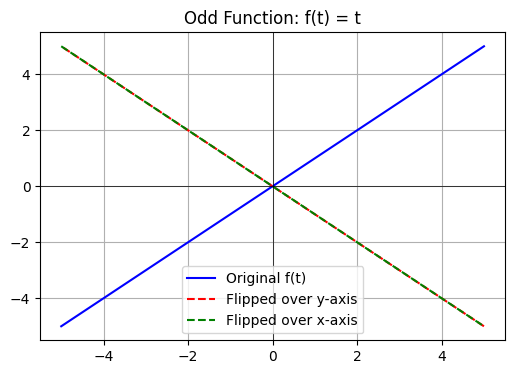

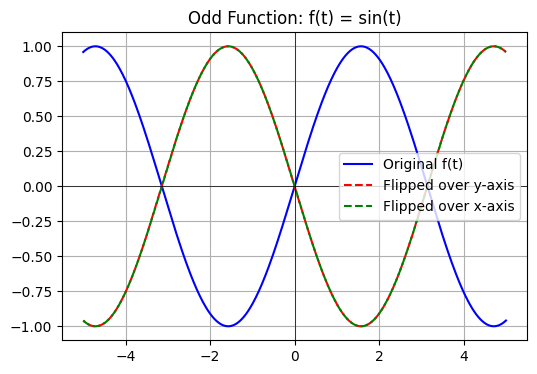

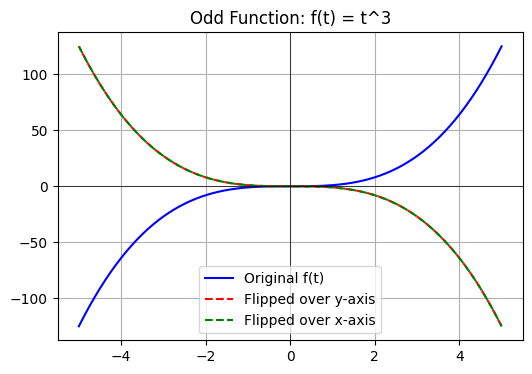

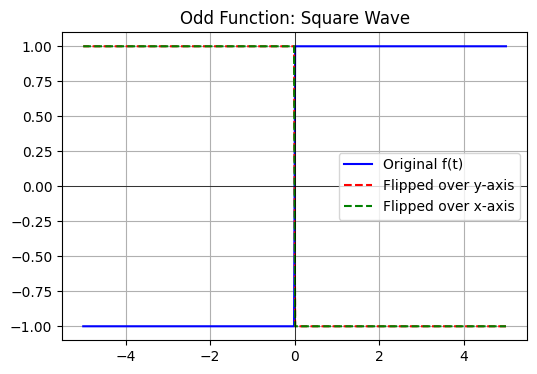

In [4]:
# Odd functions
def odd_t(t):
    return t

def odd_sin(t):
    return np.sin(t)

def odd_t3(t):
    return t**3

def odd_sqwave(t):
    return np.sign(t)

plot_function(odd_t, 'Odd Function: f(t) = t', flip_x=True, flip_y=True)
plot_function(odd_sin, 'Odd Function: f(t) = sin(t)', flip_x=True, flip_y=True)
plot_function(odd_t3, 'Odd Function: f(t) = t^3', flip_x=True, flip_y=True)
plot_function(odd_sqwave, 'Odd Function: Square Wave', flip_x=True, flip_y=True)

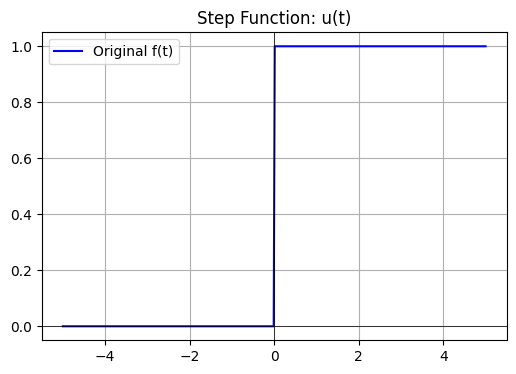

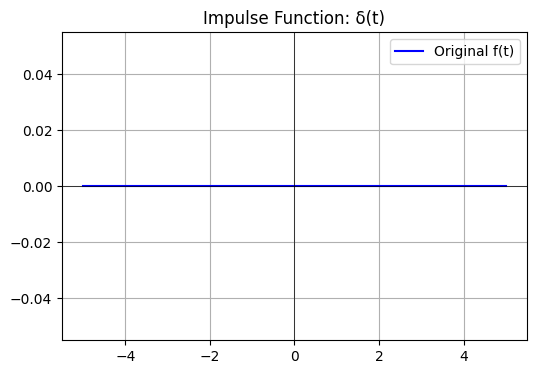

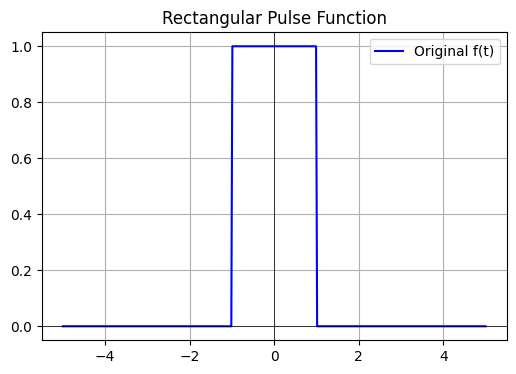

In [5]:
# Step, Impulse, and Rectangular Functions
def step_function(t):
    return np.heaviside(t, 1)

def impulse_function(t):
    return np.where(t == 0, 1, 0)  # Impulse is approximated for visualization

def rectangular_pulse(t):
    return np.where(np.abs(t) <= 1, 1, 0)

plot_function(step_function, 'Step Function: u(t)')
plot_function(impulse_function, 'Impulse Function: δ(t)')
plot_function(rectangular_pulse, 'Rectangular Pulse Function')

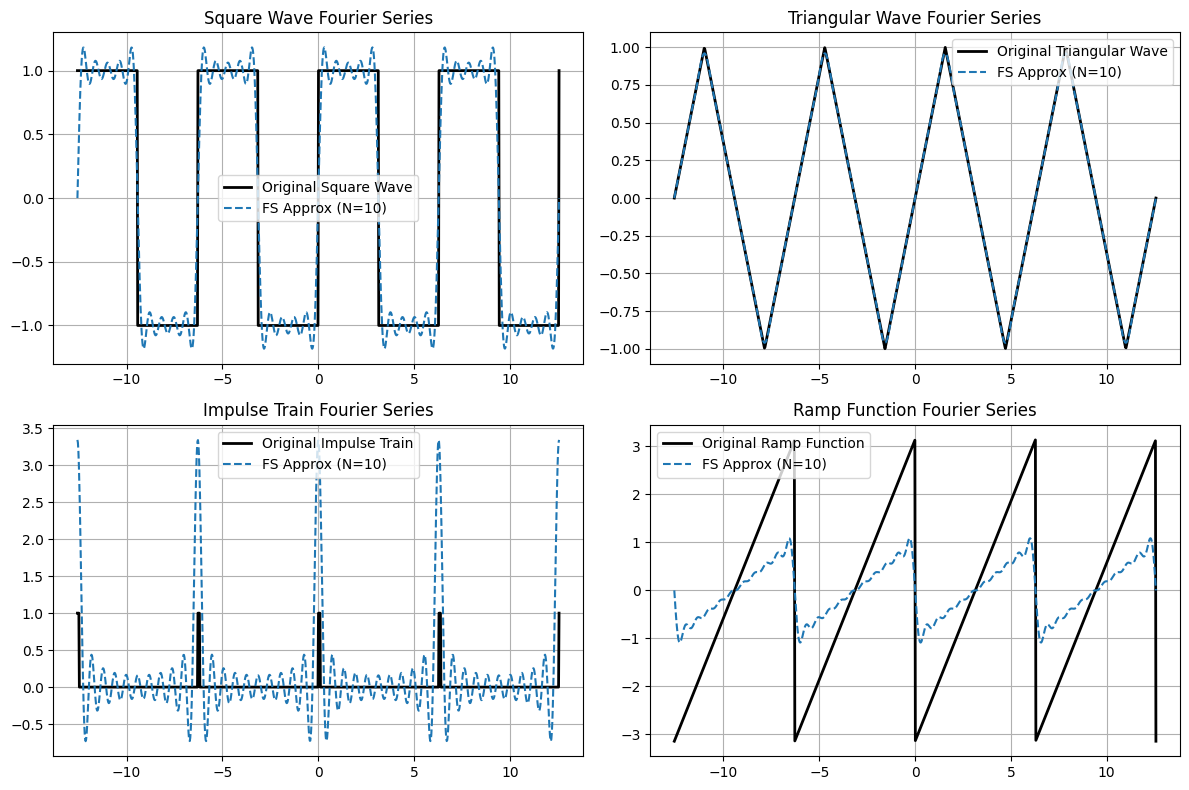

In [7]:
def square_wave(t, T):
    return np.where(np.mod(t, T) < T/2, 1, -1)

def fourier_series_square_wave(t, T, N):
    omega0 = 2 * np.pi / T
    approx = np.zeros_like(t)
    for k in range(1, N+1, 2):  # Only odd harmonics
        approx += (4 / (k * np.pi)) * np.sin(k * omega0 * t)
    return approx

def triangular_wave(t, T):
    return 4 * np.abs(np.mod(t - T/4, T) - T/2) / T - 1

def fourier_series_triangular_wave(t, T, N):
    omega0 = 2 * np.pi / T
    approx = np.zeros_like(t)
    for k in range(1, N+1, 2):  # Only odd harmonics
        approx += (8 / ((k**2) * np.pi**2)) * (-1)**((k-1)//2) * np.sin(k * omega0 * t)
    return approx

def impulse_train(t, T):
    return np.where(np.abs(np.mod(t, T)) < 0.1, 1, 0)

def fourier_series_impulse_train(t, T, N):
    omega0 = 2 * np.pi / T
    approx = np.zeros_like(t, dtype=np.complex128)  # Ensure complex type for summation
    for k in range(-N, N+1):
        approx += (1 / T) * np.exp(1j * k * omega0 * t)  # Complex exponentials
    return np.real(approx)  # Extract real part before returning

def ramp_function(t, T):
    return np.mod(t, T) - T/2

def fourier_series_ramp_function(t, T, N):
    omega0 = 2 * np.pi / T
    approx = np.zeros_like(t)
    for k in range(1, N+1):
        approx += (-2 / (k * np.pi)) * np.sin(k * omega0 * t)
    return approx

T = 2 * np.pi  # Period

t = np.linspace(-2*T, 2*T, 1000)

plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.plot(t, square_wave(t, T), label='Original Square Wave', color='black', linewidth=2)
plt.plot(t, fourier_series_square_wave(t, T, 10), label='FS Approx (N=10)', linestyle='dashed')
plt.legend()
plt.title('Square Wave Fourier Series')
plt.grid()

plt.subplot(2,2,2)
plt.plot(t, triangular_wave(t, T), label='Original Triangular Wave', color='black', linewidth=2)
plt.plot(t, fourier_series_triangular_wave(t, T, 10), label='FS Approx (N=10)', linestyle='dashed')
plt.legend()
plt.title('Triangular Wave Fourier Series')
plt.grid()

plt.subplot(2,2,3)
plt.plot(t, impulse_train(t, T), label='Original Impulse Train', color='black', linewidth=2)
plt.plot(t, fourier_series_impulse_train(t, T, 10), label='FS Approx (N=10)', linestyle='dashed')
plt.legend()
plt.title('Impulse Train Fourier Series')
plt.grid()

plt.subplot(2,2,4)
plt.plot(t, ramp_function(t, T), label='Original Ramp Function', color='black', linewidth=2)
plt.plot(t, fourier_series_ramp_function(t, T, 10), label='FS Approx (N=10)', linestyle='dashed')
plt.legend()
plt.title('Ramp Function Fourier Series')
plt.grid()

plt.tight_layout()
plt.show()

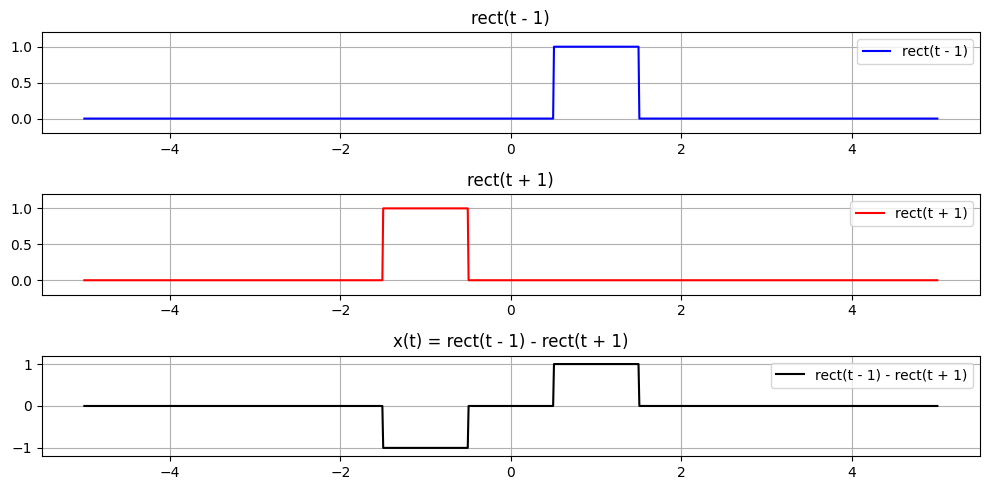

In [8]:
# Define the rectangular function manually
def rect_function(t, width=1):
    return np.where(np.abs(t) <= width / 2, 1, 0)

# Define time axis
t = np.linspace(-5, 5, 1000)  # Time range from -5 to 5

# Compute the two rectangular functions
rect_t1 = rect_function(t - 1)  # Shifted right by 1
rect_t2 = rect_function(t + 1)  # Shifted left by 1

# Compute the final function
x_t = rect_t1 - rect_t2

# Plot the individual rectangles
plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 1)
plt.plot(t, rect_t1, label='rect(t - 1)', color='blue')
plt.title('rect(t - 1)')
plt.ylim(-0.2, 1.2)
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, rect_t2, label='rect(t + 1)', color='red')
plt.title('rect(t + 1)')
plt.ylim(-0.2, 1.2)
plt.grid(True)
plt.legend()

# Plot the final function x(t)
plt.subplot(3, 1, 3)
plt.plot(t, x_t, label='rect(t - 1) - rect(t + 1)', color='black')
plt.title('x(t) = rect(t - 1) - rect(t + 1)')
plt.ylim(-1.2, 1.2)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

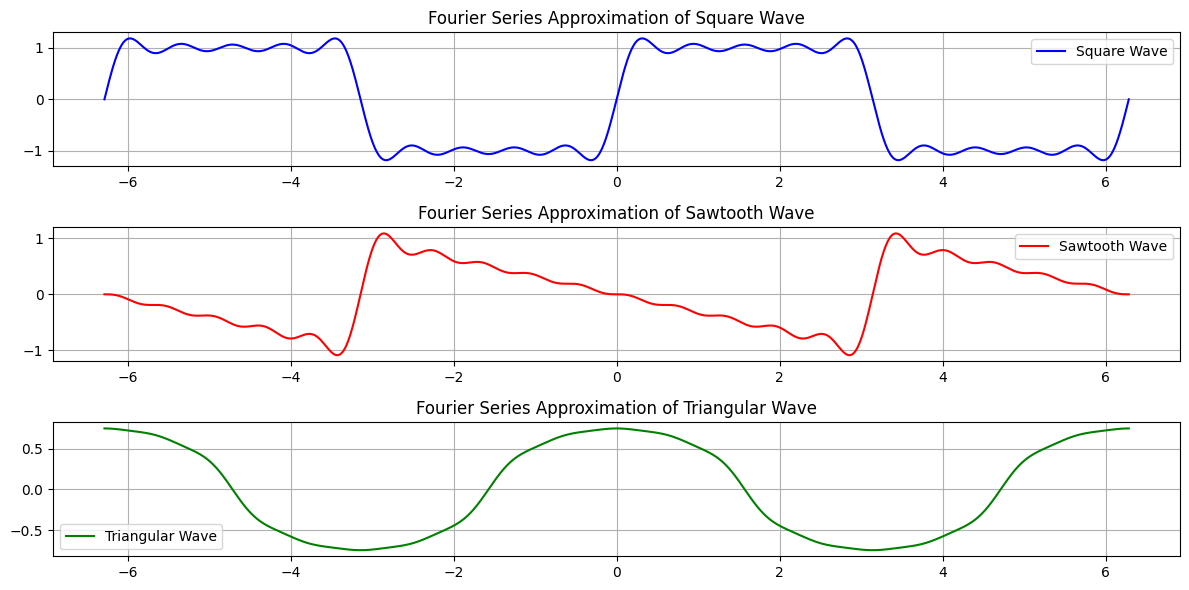

In [9]:
def square_wave(t, N, T):
    """ Approximates a square wave using Fourier series """
    omega0 = 2 * np.pi / T
    x_t = np.zeros_like(t)
    for k in range(1, N, 2):  # Only odd harmonics
        x_t += (4 / (k * np.pi)) * np.sin(k * omega0 * t)
    return x_t


def sawtooth_wave(t, N, T):
    """ Approximates a sawtooth wave using Fourier series """
    omega0 = 2 * np.pi / T
    x_t = np.zeros_like(t)
    for k in range(1, N + 1):
        x_t += (-1) ** k * (2 / (k * np.pi)) * np.sin(k * omega0 * t)
    return x_t


def triangular_wave(t, N, T):
    """ Approximates a triangular wave using Fourier series """
    omega0 = 2 * np.pi / T
    x_t = np.zeros_like(t)
    for k in range(1, N + 1, 2):  # Only odd harmonics
        x_t += (8 / ((k * np.pi) ** 2)) * (-1) ** ((k - 1) // 2) * np.cos(k * omega0 * t)
    return x_t

# Define time range
T = 2 * np.pi  # Period
N = 10  # Number of harmonics
t = np.linspace(-T, T, 1000)

# Compute signals
square = square_wave(t, N, T)
sawtooth = sawtooth_wave(t, N, T)
triangular = triangular_wave(t, N, T)

# Plot signals
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, square, label='Square Wave', color='blue')
plt.title('Fourier Series Approximation of Square Wave')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, sawtooth, label='Sawtooth Wave', color='red')
plt.title('Fourier Series Approximation of Sawtooth Wave')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, triangular, label='Triangular Wave', color='green')
plt.title('Fourier Series Approximation of Triangular Wave')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()